### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
import pandas as pd

def analisar_faturamento(lojas):
    faturamentos = []

    for i, loja in enumerate(lojas, start=1):
        loja['Faturamento'] = loja['Preço'] + loja['Frete']
        faturamento_total = loja['Faturamento'].sum()
        faturamentos.append({
            'Loja': f'Loja {i}',
            'Faturamento Total (R$)': round(faturamento_total, 2)
        })

    df_faturamento = pd.DataFrame(faturamentos)
    return df_faturamento

lojas = [loja, loja2, loja3, loja4]

resultado = analisar_faturamento(lojas)
print(resultado)


     Loja  Faturamento Total (R$)
0  Loja 1              1616347.09
1  Loja 2              1567773.22
2  Loja 3              1542047.69
3  Loja 4              1458253.46


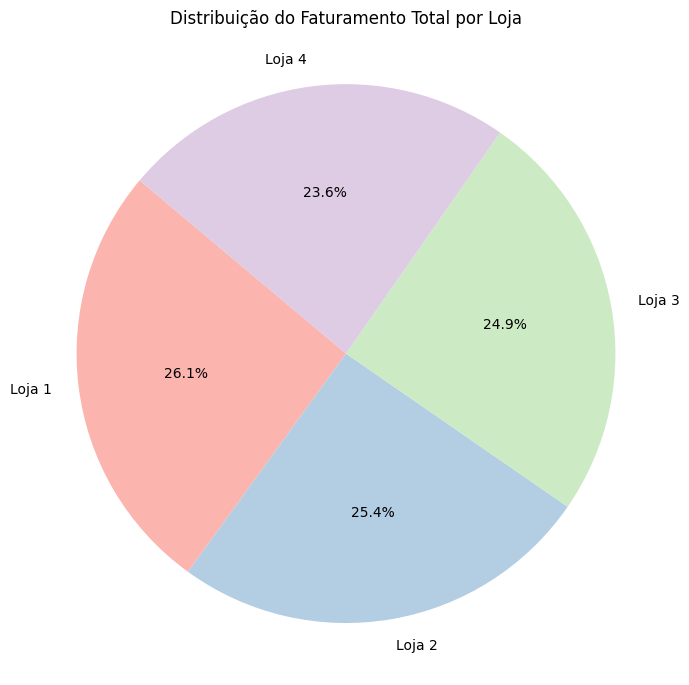

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.pie(df_faturamento['Faturamento Total (R$)'],
        labels=df_faturamento['Loja'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)

plt.title('Distribuição do Faturamento Total por Loja')
plt.axis('equal')  # deixa o círculo certinho
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [3]:
import pandas as pd

def vendas_por_categoria(lojas):
    resultados = {}

    for i, loja in enumerate(lojas, start=1):
        nome_loja = f'Loja {i}'
        vendas_categoria = loja['Categoria do Produto'].value_counts().reset_index()
        vendas_categoria.columns = ['Categoria', 'Quantidade de Vendas']
        resultados[nome_loja] = vendas_categoria

    return resultados

lojas = [loja, loja2, loja3, loja4]

vendas_categorias = vendas_por_categoria(lojas)

for loja_nome, df in vendas_categorias.items():
    print(f"\n📊 {loja_nome} - Vendas por Categoria:\n")
    print(df)



📊 Loja 1 - Vendas por Categoria:

               Categoria  Quantidade de Vendas
0                 moveis                   465
1            eletronicos                   448
2             brinquedos                   324
3       eletrodomesticos                   312
4        esporte e lazer                   284
5  instrumentos musicais                   182
6                 livros                   173
7  utilidades domesticas                   171

📊 Loja 2 - Vendas por Categoria:

               Categoria  Quantidade de Vendas
0                 moveis                   442
1            eletronicos                   422
2             brinquedos                   313
3       eletrodomesticos                   305
4        esporte e lazer                   275
5  instrumentos musicais                   224
6                 livros                   197
7  utilidades domesticas                   181

📊 Loja 3 - Vendas por Categoria:

               Categoria  Quantidade de Vendas
0 

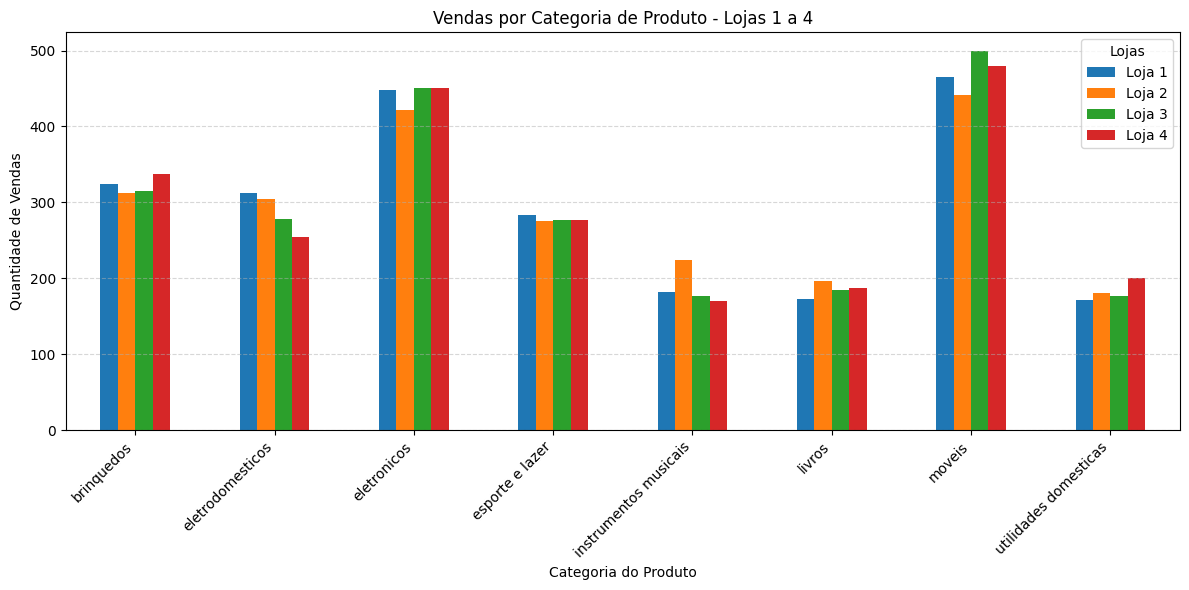

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]

df_vendas_categorias = pd.DataFrame()

for i, df in enumerate(lojas, start=1):
    nome_loja = f'Loja {i}'
    vendas_por_categoria = df['Categoria do Produto'].value_counts().rename(nome_loja)

    if df_vendas_categorias.empty:
        df_vendas_categorias = vendas_por_categoria.to_frame()
    else:
        df_vendas_categorias = df_vendas_categorias.join(vendas_por_categoria, how='outer')

df_vendas_categorias = df_vendas_categorias.fillna(0).astype(int)

df_vendas_categorias = df_vendas_categorias.sort_index()

df_vendas_categorias.plot(kind='bar', figsize=(12, 6))
plt.title('Vendas por Categoria de Produto - Lojas 1 a 4')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lojas')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 3. Média de Avaliação das Lojas

In [4]:
import pandas as pd

def media_avaliacao_lojas(lojas):
    avaliacoes = []

    for i, loja in enumerate(lojas, start=1):
        media_avaliacao = loja['Avaliação da compra'].mean()
        avaliacoes.append({
            'Loja': f'Loja {i}',
            'Média de Avaliação': round(media_avaliacao, 2)
        })

    df_avaliacoes = pd.DataFrame(avaliacoes)
    return df_avaliacoes

lojas = [loja, loja2, loja3, loja4]

avaliacoes_resultado = media_avaliacao_lojas(lojas)

print("📈 Média de Avaliação por Loja:\n")
print(avaliacoes_resultado)

📈 Média de Avaliação por Loja:

     Loja  Média de Avaliação
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00


# 4. Produtos Mais e Menos Vendidos

In [6]:
import pandas as pd

def produtos_mais_menos_vendidos(lojas):
    resultados = {}

    for i, loja in enumerate(lojas, start=1):
        nome_loja = f'Loja {i}'

        contagem_produtos = loja['Produto'].value_counts()

        max_vendas = contagem_produtos.max()
        produtos_mais_vendidos = contagem_produtos[contagem_produtos == max_vendas]

        min_vendas = contagem_produtos.min()
        produtos_menos_vendidos = contagem_produtos[contagem_produtos == min_vendas]

        resultados[nome_loja] = {
            'Mais Vendidos': produtos_mais_vendidos,
            'Menos Vendidos': produtos_menos_vendidos
        }

    return resultados

lojas = [loja, loja2, loja3, loja4]

produtos_vendas = produtos_mais_menos_vendidos(lojas)

for loja_nome, dados in produtos_vendas.items():
    print(f"\n🛒 {loja_nome}:")

    print("\n Produto(s) Mais Vendido(s):")
    print(dados['Mais Vendidos'])

    print("\n Produto(s) Menos Vendido(s):")
    print(dados['Menos Vendidos'])



🛒 Loja 1:

 Produto(s) Mais Vendido(s):
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

 Produto(s) Menos Vendido(s):
Produto
Headset         33
Celular ABXY    33
Name: count, dtype: int64

🛒 Loja 2:

 Produto(s) Mais Vendido(s):
Produto
Iniciando em programação    65
Name: count, dtype: int64

 Produto(s) Menos Vendido(s):
Produto
Jogo de tabuleiro    32
Name: count, dtype: int64

🛒 Loja 3:

 Produto(s) Mais Vendido(s):
Produto
Kit banquetas    57
Name: count, dtype: int64

 Produto(s) Menos Vendido(s):
Produto
Blocos de montar    35
Name: count, dtype: int64

🛒 Loja 4:

 Produto(s) Mais Vendido(s):
Produto
Cama box    62
Name: count, dtype: int64

 Produto(s) Menos Vendido(s):
Produto
Guitarra    33
Name: count, dtype: int64


# 5. Frete Médio por Loja

> Add blockquote




In [7]:
import pandas as pd

def frete_medio_por_loja(lojas):
    resultados = []

    for i, loja in enumerate(lojas, start=1):
        frete_medio = loja['Frete'].mean()
        resultados.append({
            'Loja': f'Loja {i}',
            'Frete Médio (R$)': round(frete_medio, 2)
        })

    df_frete = pd.DataFrame(resultados)
    return df_frete

lojas = [loja, loja2, loja3, loja4]

frete_medio_resultado = frete_medio_por_loja(lojas)

print("🚚 Frete Médio por Loja:\n")
print(frete_medio_resultado)


🚚 Frete Médio por Loja:

     Loja  Frete Médio (R$)
0  Loja 1             34.69
1  Loja 2             33.62
2  Loja 3             33.07
3  Loja 4             31.28


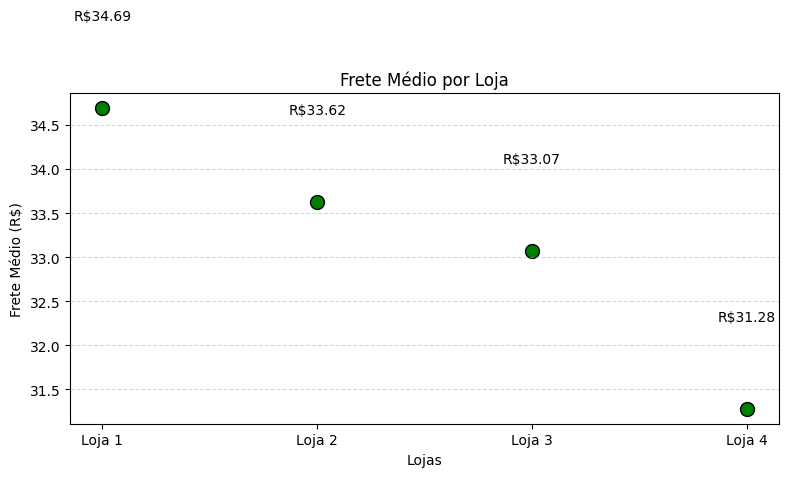

In [12]:
import matplotlib.pyplot as plt

def calcular_frete_medio(lojas):
    medias = []
    for i, loja in enumerate(lojas, start=1):
        frete_medio = loja['Frete'].mean()
        medias.append({
            'Loja': f'Loja {i}',
            'Frete Médio': round(frete_medio, 2)
        })
    return pd.DataFrame(medias)

df_frete = calcular_frete_medio(lojas)

plt.figure(figsize=(8, 5))
plt.scatter(df_frete['Loja'], df_frete['Frete Médio'], color='green', s=100, edgecolors='black')

for i in range(len(df_frete)):
    plt.text(df_frete['Loja'][i], df_frete['Frete Médio'][i] + 1, f"R${df_frete['Frete Médio'][i]}",
             ha='center', fontsize=10)

plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Relatório


# 1. Introdução


  O presente relatório tem como objetivo subsidiar a decisão do Senhor João acerca da venda de uma de suas quatro lojas virtuais. A análise foi conduzida com base em dados reais de vendas, avaliando diversos indicadores de desempenho com o intuito de identificar a loja com menor potencial estratégico e financeiro. Os principais critérios considerados foram:

  Faturamento total por loja;

  Desempenho por categoria de produto;

  Média das avaliações dos clientes;

  Produtos com maior e menor volume de vendas;

  Frete médio por loja.

  As análises foram acompanhadas de visualizações gráficas, permitindo uma compreensão clara e comparativa do desempenho de cada loja.

# 2. Análise dos Indicadores


## 2.1 Faturamento Total

O faturamento representa o principal indicador de rentabilidade das lojas. Conforme os dados analisados, temos:

    Loja	Faturamento Total (R$)
  
    Loja 1	1.616.347,09

    Loja 2	1.567.773,22

    Loja 3	1.542.047,69
    
    Loja 4	1.458.253,46

A Loja 1 apresentou o maior faturamento, sendo 10,8% superior ao da Loja 4, a de menor desempenho neste quesito.

##2.2. Desempenho por Categoria de Produto

Todas as lojas mostraram consistência nas categorias com maior volume de vendas, com destaque para móveis, eletrônicos e brinquedos. Abaixo, um exemplo dos dados para a Loja 1:

    Categoria	Quantidade de Vendas

    Móveis	465

    Eletrônicos	448

    Brinquedos	324

    Eletrodomésticos	312

    Esporte e Lazer	284

    Instrumentos Musicais	182

    Livros	173

    Utilidades Domésticas	171

As demais lojas apresentaram padrões similares, mas a Loja 3 obteve destaque em vendas da categoria móveis, com 499 unidades — o maior volume entre todas.

##2.3. Média das Avaliações dos Clientes

A reputação das lojas foi avaliada com base nas médias das avaliações recebidas:

    Loja	Média de Avaliação

    Loja 1	3.98

    Loja 2	3.96

    Loja 3	3.95

    Loja 4	3.93


A Loja 1 novamente se destaca com a maior média de avaliação, refletindo um bom nível de satisfação por parte dos clientes.

##2.4. Produtos com Maior e Menor Volume de Vendas

    Loja 1

    Mais vendidos: Micro-ondas, TV Led UHD 4K, Guarda-roupas (60 unidades cada)

    Menos vendidos: Headset, Celular ABXY (33 unidades)

    Loja 2

    Mais vendido: Iniciando em programação (65 unidades)

    Menos vendido: Jogo de tabuleiro (32 unidades)

    Loja 3

    Mais vendido: Kit banquetas (57 unidades)

    Menos vendido: Blocos de montar (35 unidades)

    Loja 4

    Mais vendido: Cama box (62 unidades)

    Menos vendido: Guitarra (33 unidades)

A Loja 1 apresenta maior variedade entre os itens mais vendidos e forte presença de produtos com alta demanda no mercado.

##2.5. Frete Médio por Loja

    Loja	Frete Médio (R$)

    Loja 1	34,69

    Loja 2	33,62

    Loja 3	33,07

    Loja 4	31,28


Embora a Loja 4 tenha o menor valor médio de frete, este fator, por si só, não compensa os desempenhos mais fracos nos demais indicadores.

# 3. Conclusão e Recomendação


Com base nos dados analisados, conclui-se que a Loja 1 é a que apresenta o melhor desempenho geral. Ela lidera em faturamento, média de avaliações, variedade e volume de vendas de produtos relevantes e possui um equilíbrio satisfatório entre custo de frete e lucratividade.

Recomendação:
Recomenda-se manter a Loja 1 no portfólio do Senhor João, por sua performance sólida e consistente, e considerar a venda da Loja 4, que apresenta o menor faturamento, a pior média de avaliação e desempenho inferior em categorias estratégicas.

Esta decisão está fundamentada em análises quantitativas e qualitativas que evidenciam o potencial de crescimento e retorno da Loja 1 em comparação com as demais.